In [1]:
import itertools
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def old_school_inv(m):
    nrow, ncol = m.shape[0], m.shape[1]
    # Get minor matrix.
    minor = np.zeros_like(m)
    for r, c in itertools.product(range(nrow), range(ncol)):
        rmask = [True] * nrow
        cmask = [True] * ncol
        rmask[r] = False
        cmask[c] = False
        minor[r, c] = np.linalg.det(m[rmask, :][:, cmask])
        
    # Get cofactor matrix
    cofactor = np.zeros_like(m)
    for r, c in itertools.product(range(nrow), range(ncol)):
        cofactor[r, c] = (-1)**(r + c) * minor[r, c]
    
    return cofactor.T / np.linalg.det(m)   

In [3]:
def new_school_inv(m):
    q, r = np.linalg.qr(m)
    return np.linalg.inv(r) @ q.T

In [4]:
errs_5 = np.zeros((2, 100))
for i in range(100):
    M = np.random.randn(5, 5)
    errs_5[0, i] = np.sqrt(np.sum((np.eye(5, 5) - M @ old_school_inv(M))**2))
    errs_5[1, i] = np.sqrt(np.sum((np.eye(5, 5) - M @ new_school_inv(M))**2))

In [5]:
errs_30 = np.zeros((2, 100))
for i in range(100):
    M = np.random.randn(30, 30)
    errs_30[0, i] = np.sqrt(np.sum((np.eye(30, 30) - M @ old_school_inv(M))**2))
    errs_30[1, i] = np.sqrt(np.sum((np.eye(30, 30) - M @ new_school_inv(M))**2))

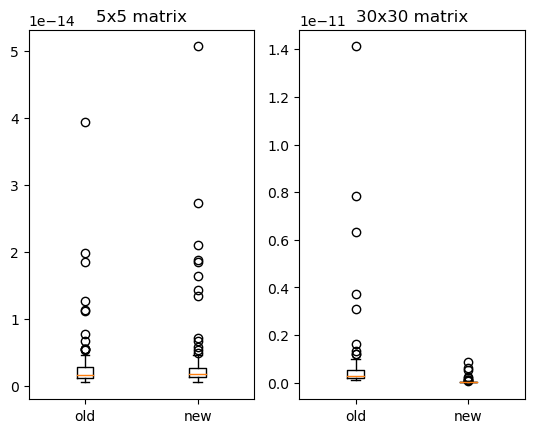

In [6]:
fig, axes = plt.subplots(1, 2)

axes[0].set_title("5x5 matrix")
axes[0].boxplot([errs_5[0, :], errs_5[1, :]], labels=["old", "new"])
axes[1].set_title("30x30 matrix")
axes[1].boxplot([errs_30[0, :], errs_30[1, :]], labels=["old", "new"])

plt.show()